# Capstone 1 - Part 1

### Dataset: Download CSV file from [here](https://drive.google.com/file/d/1LfquyGkEO45x35q8yvYzke8lswCfBu89/view?usp=sharing)
 
### Context & Problem statement:

This is a fictional data set that contains atmost 30 features of categorical and discreet data. These data are kind of both numerical and text values which help in analysing the employee data from hiring to firing and on boarding to attrition.  Dive into current available HR metrics to reduce the attrition rate and improve employee performance. Employee attrition has long been a significant worry for organizations due to the substantial investments of time, money, and effort in training new employees. When an employee departs, it results in overall losses for the company, including the cost of replacing and retraining, as well as disruptions in workflow. Moreover, attrition can erode trust among remaining employees, creating additional management challenges.

The HR Attrition dataset, albeit fictional, serves the purpose of identifying key factors that could play a pivotal role in determining which employees are more likely to leave the company and who is likely to stay. In this capstone, we delve into a thorough analysis of these influential factors and employ predictive modeling techniques to gain a deeper understanding, ultimately enabling us to make accurate predictions regarding employee attrition.

### Business use case:

- Brief overview of attrition within the organization
- Explore the main factors that lead to employee attrition
- Propose relevant contributors to Performance Ratings and calculate their correlations

### Goals/ Metrics:

- Identify top reasons for attrition and recommend further action steps to improve
- Point out key factors that drive employee performance

## TODO: Please make use of Python, Pandas, Numpy, Matplotlib and relevant libraries to do the following:

### Data Retrieval (1 pt)
- Extracting the dataset from the source (e.g., CSV file)
- Exploring the dataset structure, features, and target variable (attrition)
- Understanding the context and significance of each feature in relation to employee attrition

### Data preprocessing (2 pts)
- Cleaning the dataset to handle missing values, duplicates, and outliers
- Encoding categorical variables and transforming data types as necessary

### Feature Engineering & EDA (3 pts)
- Feature engineering to create new variables (e.g., employee tenure, performance scores) and do Exploratory Data Analysis (EDA)
- Analyzing factors contributing to employee attrition (e.g., age, job role, salary, work environment)
- Visualizing attrition rates across different demographic and employment-related variables
- Identifying correlations and patterns in the data to understand attrition drivers
- Make use of 1-d and 2-d explorations to know your data better.

### Effective Communication (2 pts)
- Please make use of markdown cells to communicate your thought process, why did you think of performing a step? what was the observation from the visualization? etc. 
- Make sure the plots are correctly labelled. 
- The code should be commented so that it is readable for the reviewer.

### Grading and Important Instructions
- Each of the above steps are mandatory and should be completed in good faith
- Make sure before submitting that the code is in fully working condition
- It is fine to make use of ChatGPT, stackoverflow type resources, just provide the reference links from where you got it
- Debugging is an art, if you find yourself stuck with errors, take help of stackoverflow and ChatGPT to resolve the issue and if it's still unresolved, reach out to me for help.
- You need to score atleast 7/10 to pass the project, anything less than that will be marked required, needing resubmission.
- Feedback will be provided on 3 levels (Awesome, Suggestion, & Required). Required changes are mandatory to be made.
- For submission, please upload the project on github and share the link to the file with us through LMS.

#### Write your code below and do not delete the above instructions

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
file_path = '/Users/ujwalnani/Downloads/HR-Analytics.csv'
data = pd.read_csv(file_path)

data.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [3]:
# Exploring the dataset structure
print("Dataset Info:\n")
data.info()

print("\nSummary Statistics:\n")
print(data.describe())

print("\nChecking for missing values:\n")
print(data.isnull().sum())

print("\nChecking for duplicate rows:\n")
print(data.duplicated().sum())


Dataset Info:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel 

In [7]:
# Data Preprocessing: Handling missing values
# Fill missing numerical values with the median
data.fillna(data.median(numeric_only=True), inplace=True)

# Fill missing categorical values with the mode
categorical_cols = data.select_dtypes(include=['object']).columns
for col in categorical_cols:
    mode_value = data[col].mode()[0]
    data[col] = data[col].fillna(mode_value)


# Removing duplicate rows
data.drop_duplicates(inplace=True)

print("\nAfter Preprocessing - Missing Values:\n")
print(data.isnull().sum())

print("\nAfter Preprocessing - Dataset Shape:\n")
print(data.shape)



After Preprocessing - Missing Values:

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0


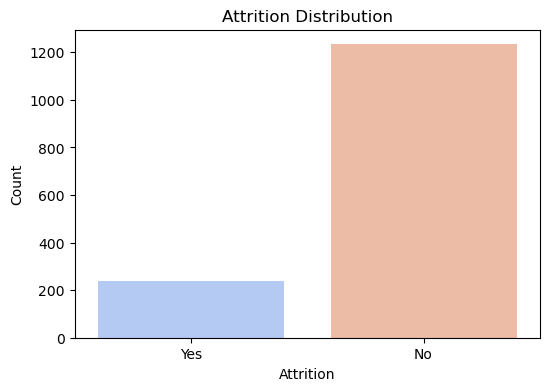

In [51]:
# --- Feature Engineering ---
# Creating a new feature: 'Tenure' (Years at company)
data['Tenure'] = data['YearsAtCompany']

# Creating a new feature: 'AgeGroup'
data['AgeGroup'] = pd.cut(data['Age'], bins=[18, 30, 40, 50, 60], labels=['18-30', '31-40', '41-50', '51-60'])

# Creating a new feature: 'IsFrequentTraveler'
data['IsFrequentTraveler'] = data['BusinessTravel'].apply(lambda x: 1 if x == 'Travel_Frequently' else 0)

# --- Exploratory Data Analysis (EDA) ---
# Visualizing attrition distribution
plt.figure(figsize=(6, 4))
sns.countplot(data=data, x='Attrition', palette='coolwarm', hue='Attrition', dodge=False)
plt.title('Attrition Distribution')
plt.xlabel('Attrition')
plt.ylabel('Count')
plt.show()

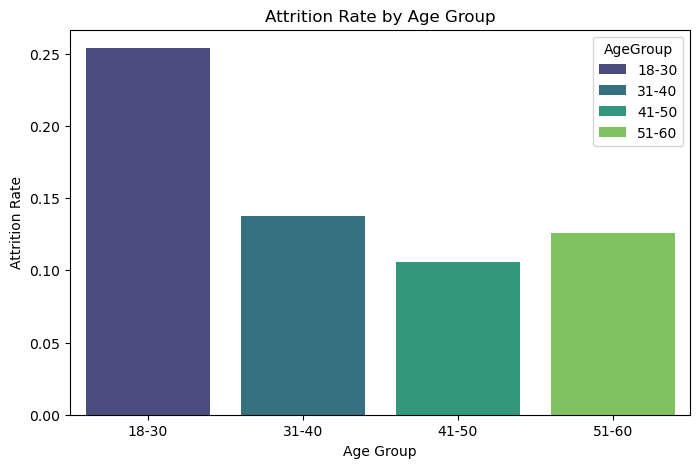

In [55]:
# Attrition rate by Age Group
plt.figure(figsize=(8, 5))
sns.barplot(x='AgeGroup', y=data['Attrition'].apply(lambda x: 1 if x == 'Yes' else 0), hue='AgeGroup', data=data, errorbar=None, palette='viridis')
plt.title('Attrition Rate by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Attrition Rate')
plt.show()


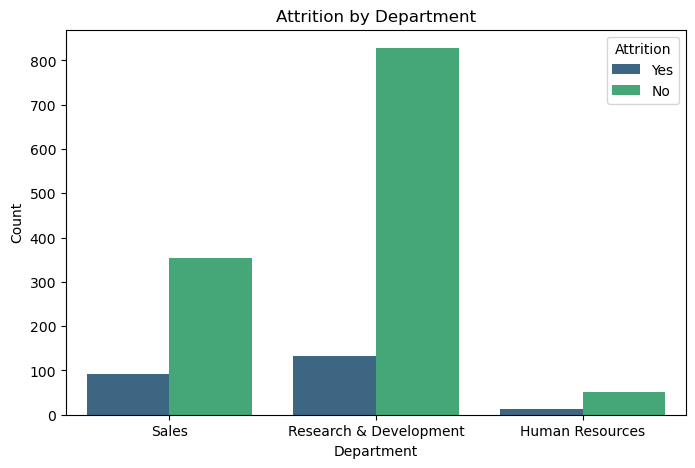

In [33]:
# Attrition by Department
plt.figure(figsize=(8, 5))
sns.countplot(x='Department', hue='Attrition', data=data, palette='viridis')
plt.title('Attrition by Department')
plt.xlabel('Department')
plt.ylabel('Count')
plt.legend(title='Attrition')
plt.show()

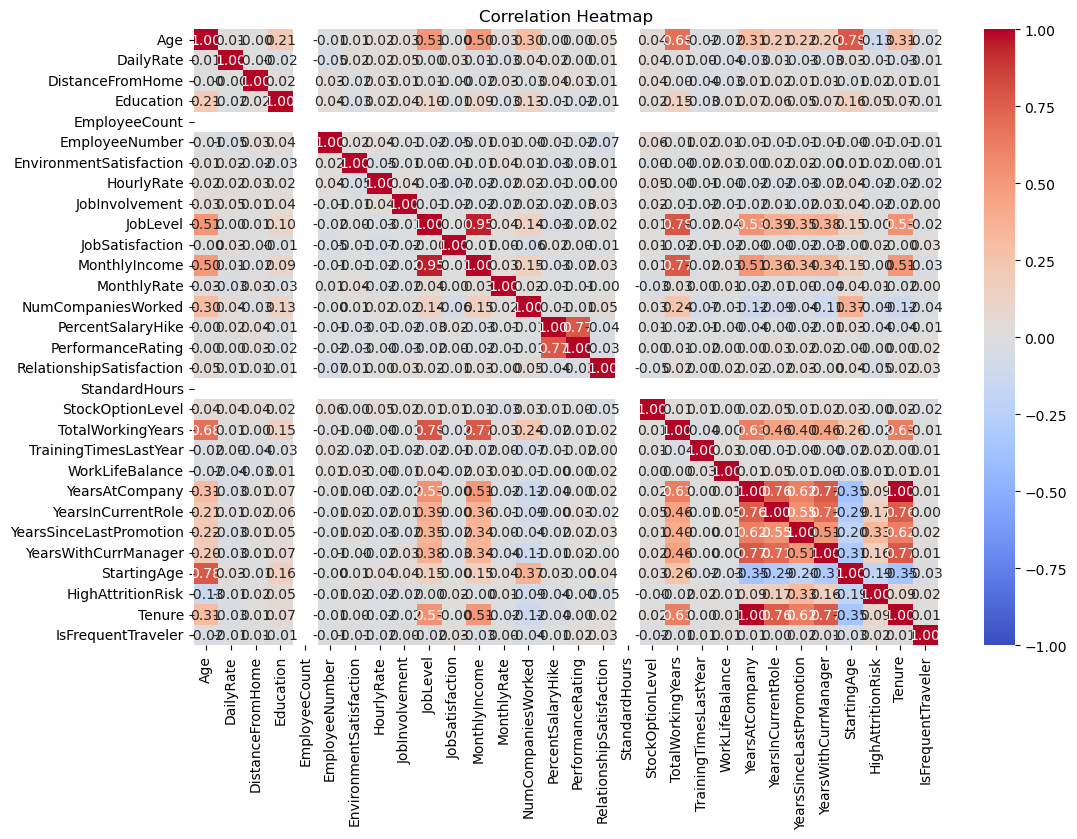

In [43]:
# Correlation Heatmap
plt.figure(figsize=(12, 8))
numeric_cols = data.select_dtypes(include=['number'])
corr_matrix = numeric_cols.corr()
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Heatmap')
plt.show()



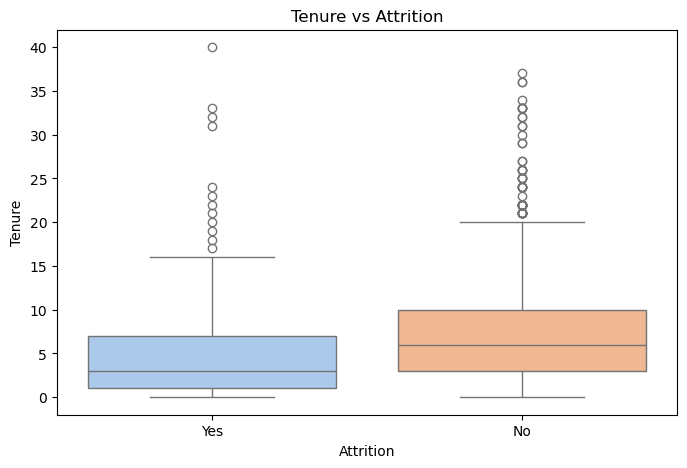

In [57]:
# Tenure and Attrition
plt.figure(figsize=(8, 5))
sns.boxplot(x='Attrition', y='Tenure', data=data, palette='pastel', hue='Attrition', dodge=False)
plt.title('Tenure vs Attrition')
plt.xlabel('Attrition')
plt.ylabel('Tenure')
plt.show()


** Summary
1. Visualizing Attrition Distribution
We use a count plot to visualize the distribution of attrition. This helps us understand how many employees left vs. stayed.
Observation: This plot helps us see if the dataset is balanced or if there is a higher attrition rate.

Attrition Label: The "Yes"/"No" value in the Attrition column provides a direct answer.

3. Attrition Rate by Age Group
This bar plot shows how attrition rates vary across different age groups.
Observation: By segmenting by age group, we can identify if younger or older employees are more likely to leave.



4. Attrition by Department
This count plot shows how attrition varies across different departments.
Observation: This visualization helps us identify departments with higher or lower attrition rates.

5. Correlation Heatmap
We plot a heatmap to check for correlations between numerical variables. Correlations are important in understanding relationships between features and can help with feature selection.
Observation: A heatmap allows us to quickly identify any strong correlations, such as between YearsAtCompany and Tenure, which might indicate redundancy in features.

6. Tenure vs Attrition
We use a boxplot to explore the relationship between employee tenure and attrition. This can show if employees with shorter tenure are more likely to leave.
Observation: A boxplot shows how tenure varies across attrition groups, which might reveal that employees with shorter tenure are more likely to leave.



Insights from EDA:
By analyzing variables such as age, department, and tenure, we can identify specific employee groups that are more likely to leave.
Correlations between attrition and other numerical features (e.g., job satisfaction, years at the company) offer deeper insights into why employees are leaving.
